As [published by Killian](https://twitter.com/hellokillian/status/1699156860073640038?s=20https://twitter.com/hellokillian/status/1699156860073640038?s=20)

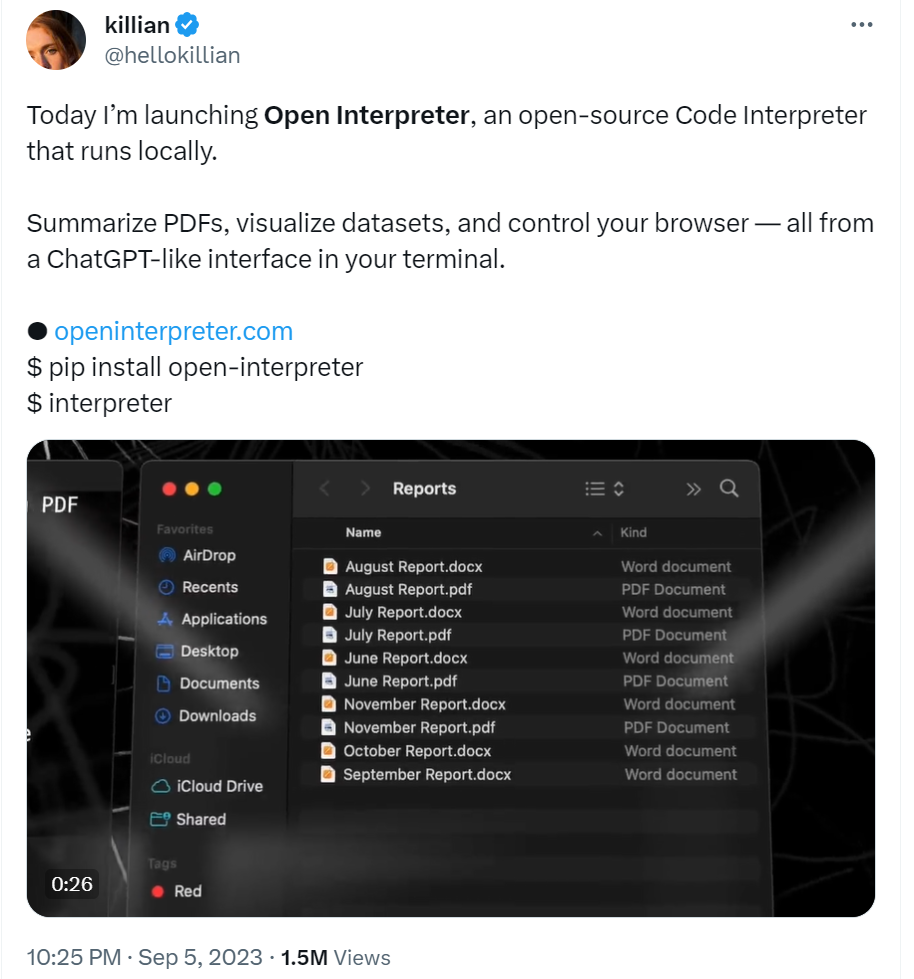

# Installation under WSL

## interpreter environnement

```bash
mamba create -n interpreter -y python=3.11
mamba activate interpreter
pip install open-interpreter

sudo apt install build-essential cmake
```` 

## configuration of interpreter, installation of `llama_cpp`

1st thing is a configuration.

I don't have GPT-4 API key, which is the preferred option. No other choice than to use Code-Llama (free but less capable).

Advantage is that it is a local version, and interpreter asks about its configuration:

- parameter count (I choosed 34 B)

- quality (I choosed Large - 33.4 GB)

- GPU (of course yes)

### error log

But during installation of `TheBloke/CodeLlama-34B-Instruct-GGUF`, it fails with this message.


```log
Building wheels for collected packages: llama-cpp-python
  Building wheel for llama-cpp-python (pyproject.toml) ... error
  error: subprocess-exited-with-error

  × Building wheel for llama-cpp-python (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [26 lines of output]
      *** scikit-build-core 0.5.0 using CMake 3.27.4 (wheel)
      *** Configuring CMake...
      2023-09-13 19:04:10,988 - scikit_build_core - WARNING - libdir/ldlibrary: /home/guillaume/miniconda/envs/interpreter/lib/libpython3.11.a is not a real file!
      2023-09-13 19:04:10,989 - scikit_build_core - WARNING - Can't find a Python library, got libdir=/home/guillaume/miniconda/envs/interpreter/lib, ldlibrary=libpython3.11.a, multiarch=x86_64-linux-gnu, masd=None
      loading initial cache file /tmp/tmph_bvsb06/build/CMakeInit.txt
      -- The C compiler identification is unknown
      -- The CXX compiler identification is unknown
      CMake Error at CMakeLists.txt:3 (project):
        No CMAKE_C_COMPILER could be found.

        Tell CMake where to find the compiler by setting either the environment
        variable "CC" or the CMake cache entry CMAKE_C_COMPILER to the full path to
        the compiler, or to the compiler name if it is in the PATH.


      CMake Error at CMakeLists.txt:3 (project):
        No CMAKE_CXX_COMPILER could be found.

        Tell CMake where to find the compiler by setting either the environment
        variable "CXX" or the CMake cache entry CMAKE_CXX_COMPILER to the full path
        to the compiler, or to the compiler name if it is in the PATH.


      -- Configuring incomplete, errors occurred!

      *** CMake configuration failed
      [end of output]

  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for llama-cpp-python
Failed to build llama-cpp-python
ERROR: Could not build wheels for llama-cpp-python, which is required to install pyproject.toml-based projects
Error during installation with cuBLAS: Command
'['/home/guillaume/miniconda/envs/interpreter/bin/python', '-m',
'pip', 'install', 'llama-cpp-python']' returned non-zero exit status1.

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/guillaume/miniconda/envs/interpreter/lib/python3.11/site-packages/interpreter/interpreter.py", line 203, in chat
    self.llama_instance = get_hf_llm(self.model, self.debug_mode, self.context_window)
                          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/guillaume/miniconda/envs/interpreter/lib/python3.11/site-packages/interpreter/get_hf_llm.py", line 200, in get_hf_llm
    from llama_cpp import Llama
ModuleNotFoundError: No module named 'llama_cpp'

Failed to install TheBloke/CodeLlama-34B-Instruct-GGUF.

Common Fixes: You can follow our simple setup docs at the link belowto resolve common errors.


 https://github.com/KillianLucas/open-interpreter/tree/main/docs


If you've tried that and you're still getting an error, we have
likely not built the proper TheBloke/CodeLlama-34B-Instruct-GGUF
support for your system.

( Running language models locally is a difficult task! If you have
insight into the best way to implement this across
platforms/architectures, please join the Open Interpreter community
Discord and consider contributing the project's development. )
```

### interpreter help

This page explains additionnal stuff 

https://github.com/KillianLucas/open-interpreter/blob/main/docs/GPU.md#windows-subsystem-for-linux-2-wsl2

I tried with

```bash
CUDA_PATH=/usr/local/cuda FORCE_CMAKE=1 CMAKE_ARGS='-DLLAMA_CUBLAS=on' \
pip install llama-cpp-python --force-reinstall --upgrade --no-cache-dir -vv
```

# First execution

Just run `interpreter -y --local`

1st tests, this is extremely slow, and it doesn't seem to use GPU. (that's maybe why)

Maybe I can switch to a lighter model, since I have only 16 GB of GPU RAM.

In [4]:
%%HTML
<video width="600" height="100" controls>
  <source src="../images/videos/open-interpreter.mp4" type="video/mp4">
</video>

It takes ~1 min to load the model in memory. And then about 2-3 secs per character.

And it looks like it doesn't use GPU.

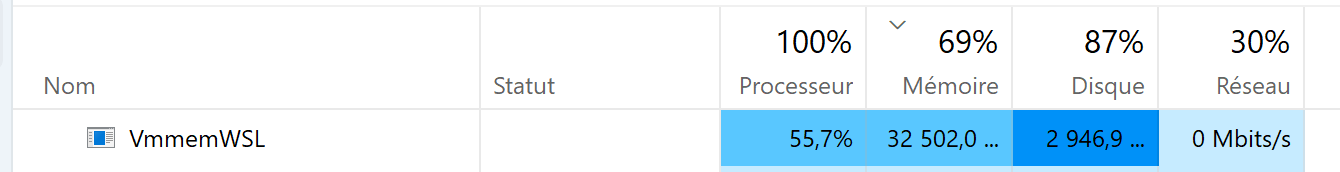

## with a smaller modele

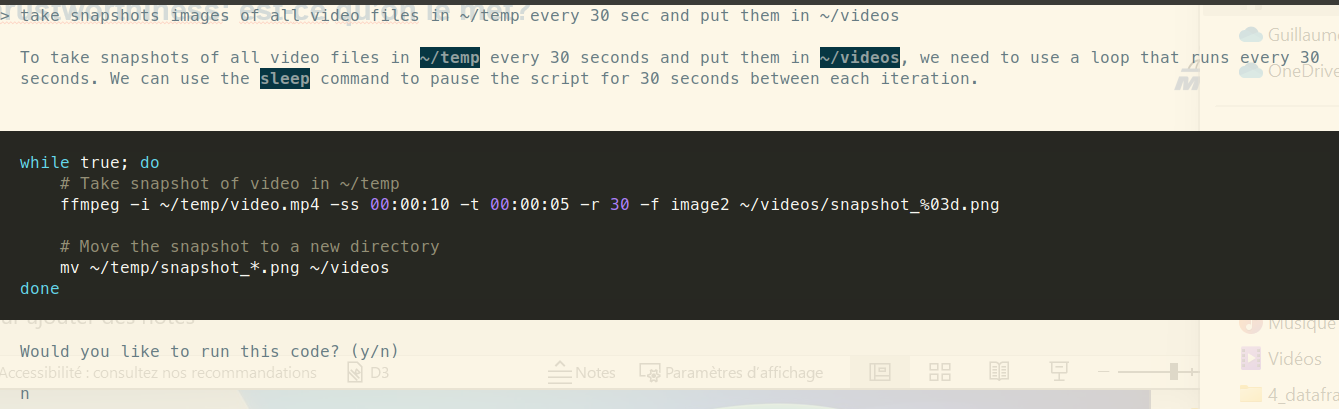

Here this is reasonnably fast but runs in CPU and answers are not what I expect. Is it due to smaller model? Do I have to switch to a bigger one on GPU? Or to GPT-4 ?

# Activate GPU

With this command you can check if GPU is in used:

```bash
> python -c "from llama_cpp import GGML_USE_CUBLAS; print(GGML_USE_CUBLAS)"
False
```

And as suspected, it is not.

I can get back to CUDA toolkit installation issue. 

To verify it is correctly installed, just see if something is in 

```bash
> ls /usr/local/cuda/bin/nvcc
ls: cannot access '/usr/local/cuda/bin/nvcc': No such file or directory
```

## option 1 - install NVIDIA toolkit for WSL2

As explained in https://github.com/KillianLucas/open-interpreter/blob/main/docs/GPU.md#windows-subsystem-for-linux-2-wsl2

Get the latest [NVIDIA CUDA Toolkit for WSL2](https://developer.nvidia.com/cuda-downloads) and run the provided steps in a WSL terminal.

- Operating System: Linux

- Architecture: x86_64

- Distribution: WSL-Ubuntu

- Version: 2.0

- Installer Type: deb (local) (recommended network but it cannot work in my configuration)

Install it

```bash
wget https://developer.download.nvidia.com/compute/cuda/repos/wsl-ubuntu/x86_64/cuda-wsl-ubuntu.pin
sudo mv cuda-wsl-ubuntu.pin /etc/apt/preferences.d/cuda-repository-pin-600
wget https://developer.download.nvidia.com/compute/cuda/12.2.2/local_installers/cuda-repo-wsl-ubuntu-12-2-local_12.2.2-1_amd64.deb
sudo dpkg -i cuda-repo-wsl-ubuntu-12-2-local_12.2.2-1_amd64.deb
sudo cp /var/cuda-repo-wsl-ubuntu-12-2-local/cuda-*-keyring.gpg /usr/share/keyrings/
sudo apt-get update
sudo apt-get -y install cuda
```

And check if it is installed correctly

```bash
> ls /usr/local/cuda/bin/nvcc
/usr/local/cuda/bin/nvcc
```

Let's reinstall `llama-cpp-python`

```bash
CUDA_PATH=/usr/local/cuda FORCE_CMAKE=1 CMAKE_ARGS='-DLLAMA_CUBLAS=on' \
pip install llama-cpp-python --force-reinstall --upgrade --no-cache-dir -vv
```

And now it should run on GPU

```bash
❯ python -c "from llama_cpp import GGML_USE_CUBLAS; print(GGML_USE_CUBLAS)"
True
```

## option 2 - install NVIDIA toolkit for WSL2

This [PR](https://github.com/KillianLucas/open-interpreter/pull/339) installs official NVIDIA wheels for CUDA support so the CUDA Toolkit does not need to be installed.

It has not yet been integrated but it will with no doubt be the next preferred way to setup interpreter. 

# Same player plays again

```bash
> can you extract image thumbnails from videos located at ~/temp. I would like one thumbnail every 30 sec

CUDA error 222 at /tmp/pip-install-7adlwzq5/llama-cpp-python_3c7138fe0e4b431896302eb4fb73f813/vendor/llama.cpp/ggml-cuda.cu:6233: the provided PTX was compiled with an unsupported toolchain.
current device: 0

```

There is an issue reported at llama-cpp-python repo [CUDA Error 222 - provided PTX was compiled with an unsupported toolchain](https://github.com/abetlen/llama-cpp-python/issues/401#issuecomment-1658016387)

With this option

```bash
cd ~/temp
git clone --recursive https://github.com/ggerganov/llama.cpp.git
cd llama.cpp
CUDA_PATH=/usr/local/cuda PATH=/usr/local/cuda/bin:$PATH make LLAMA_CUBLAS=1 -j libllama.so

# HACK: Use custom compiled libllama.so
cp ~/temp/llama.cpp/libllama.so /home/guillaume/miniconda/envs/interpreter/lib/python3.11/site-packages/llama_cpp
```

We can know try again, and this time it "technically" works:

%%HTML
<video width="750" height="500" controls>
  <source src="../images/videos/open-interpreter-small-model-x265.mp4" type="video/mp4">
</video>

but answer is not really what we expect, isn't it?